# Real Estate Price Analysis in Poland

**Author:** [Your Name]  
**Date:** February 2026  
**Dataset:** Polish Apartments January 2024

---

## Project Overview

This analysis explores the factors affecting real estate prices in major Polish cities. The goal is to identify key price drivers and understand market dynamics.

### Research Questions

1. What factors affect apartment prices?
2. Which cities are the most expensive?
3. How does infrastructure impact pricing?
4. What is the relationship between apartment condition and price?

### Dataset Information

- **Source:** Polish Apartments Dataset (January 2024)
- **Size:** 15,521 apartments across 28 features
- **Coverage:** Major cities in Poland

## 1. Setup and Data Loading

Import necessary libraries and load the dataset.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


In [11]:
# Load dataset
DATA_PATH = 'datasets/archive1/apartments_pl_2024_01.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print(f"✓ Dataset loaded successfully")
    print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print(f"✗ Error: File not found at {DATA_PATH}")
    print("  Please check the file path and try again.")

✓ Dataset loaded successfully
  Shape: 15,521 rows × 28 columns


## 2. Exploratory Data Analysis (EDA)

### 2.1 Dataset Overview

In [12]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.43,14.49,5.06,1.0,1.08,0.95,0.62,0.79,1.05,3.06,0.34,condominium,brick,premium,no,yes,yes,no,no,1199999
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.45,14.55,3.24,9.0,0.28,0.67,0.37,0.25,0.30,1.86,0.28,condominium,brick,NaN,no,no,no,no,no,650000
2,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.46,14.58,3.94,7.0,0.14,1.34,0.93,0.93,0.07,0.79,0.30,condominium,brick,NaN,no,yes,no,no,yes,590000
3,3eaa36a59b9354206703b5f6b2f2ff1d,szczecin,blockOfFlats,42.00,2.0,1.0,3.0,NaN,53.47,14.54,5.19,9.0,0.21,1.53,0.20,0.32,0.16,2.72,0.26,condominium,NaN,NaN,no,yes,no,no,no,584999
4,027b30cebbc49faf3094421b741ddd56,szczecin,blockOfFlats,45.50,2.0,4.0,4.0,1960.0,53.44,14.56,1.65,18.0,0.25,0.62,0.51,0.18,0.23,0.99,0.27,condominium,concreteSlab,low,no,no,no,no,yes,363000


In [4]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15521 non-null  str    
 1   city                  15521 non-null  str    
 2   type                  12065 non-null  str    
 3   squareMeters          15521 non-null  float64
 4   rooms                 15521 non-null  float64
 5   floor                 12707 non-null  float64
 6   floorCount            15329 non-null  float64
 7   buildYear             13020 non-null  float64
 8   latitude              15521 non-null  float64
 9   longitude             15521 non-null  float64
 10  centreDistance        15521 non-null  float64
 11  poiCount              15521 non-null  float64
 12  schoolDistance        15503 non-null  float64
 13  clinicDistance        15464 non-null  float64
 14  postOfficeDistance    15496 non-null  float64
 15  kindergar

In [13]:
# Basic statistics
print("Numerical Features Summary:")
print("=" * 50)
df.describe()

Numerical Features Summary:


,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,15521.00,15521.00,12707.0,15329.00,13020.00,15521.00,15521.00,15521.00,15521.00,1.55e+04,1.55e+04,1.55e+04,1.55e+04,1.55e+04,15102.00,1.55e+04,1.55e+04
mean,60.16,2.73,3.3,5.24,1986.31,52.04,19.39,4.25,21.21,4.14e-01,9.63e-01,5.16e-01,3.70e-01,3.44e-01,1.42,3.58e-01,8.16e+05
std,22.19,0.94,2.5,3.25,34.81,1.36,1.79,2.82,25.27,4.70e-01,8.87e-01,5.03e-01,4.53e-01,4.72e-01,1.10,4.65e-01,4.29e+05
min,25.00,1.00,1.0,1.00,1850.00,49.98,14.45,0.02,0.00,2.00e-03,1.00e-03,1.00e-03,1.00e-03,1.00e-03,0.01,1.00e-03,1.75e+05
25%,45.00,2.00,2.0,3.00,1966.00,51.11,18.50,1.89,7.00,1.76e-01,3.49e-01,2.38e-01,1.57e-01,1.12e-01,0.56,1.42e-01,5.49e+05
50%,56.00,3.00,3.0,4.00,1998.00,52.20,19.55,3.85,14.00,2.91e-01,6.72e-01,3.95e-01,2.64e-01,2.26e-01,1.09,2.39e-01,7.20e+05
75%,70.49,3.00,4.0,6.00,2016.00,52.45,20.98,6.07,25.00,4.73e-01,1.23e+00,6.23e-01,4.18e-01,4.06e-01,2.03,4.03e-01,9.65e+05
max,150.00,6.00,29.0,29.00,2024.00,54.61,23.20,16.51,212.00,4.91e+00,4.94e+00,4.91e+00,4.96e+00,4.99e+00,5.00,4.86e+00,3.25e+06


### 2.2 Missing Values Analysis

Identifying and quantifying missing data to determine appropriate handling strategies.

In [14]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Percentage', ascending=False)

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]

print("Missing Values Summary:")
print("=" * 50)
print(missing_data)

# Categorize missing data severity
print("\n" + "=" * 50)
print("Missing Data Severity:")
print("  Critical (>50%):  ", missing_data[missing_data['Percentage'] > 50].index.tolist())
print("  Moderate (15-50%):", missing_data[(missing_data['Percentage'] >= 15) & (missing_data['Percentage'] <= 50)].index.tolist())
print("  Minor (<15%):     ", missing_data[missing_data['Percentage'] < 15].index.tolist())

Missing Values Summary:
                      Missing_Count  Percentage
condition                     11836       76.26
buildingMaterial               5991       38.60
type                           3456       22.27
floor                          2814       18.13
buildYear                      2501       16.11
hasElevator                     782        5.04
collegeDistance                 419        2.70
floorCount                      192        1.24
clinicDistance                   57        0.37
restaurantDistance               38        0.24
pharmacyDistance                 27        0.17
postOfficeDistance               25        0.16
kindergartenDistance             22        0.14
schoolDistance                   18        0.12

Missing Data Severity:
  Critical (>50%):   ['condition']
  Moderate (15-50%): ['buildingMaterial', 'type', 'floor', 'buildYear']
  Minor (<15%):      ['hasElevator', 'collegeDistance', 'floorCount', 'clinicDistance', 'restaurantDistance', 'pharmacyDistan

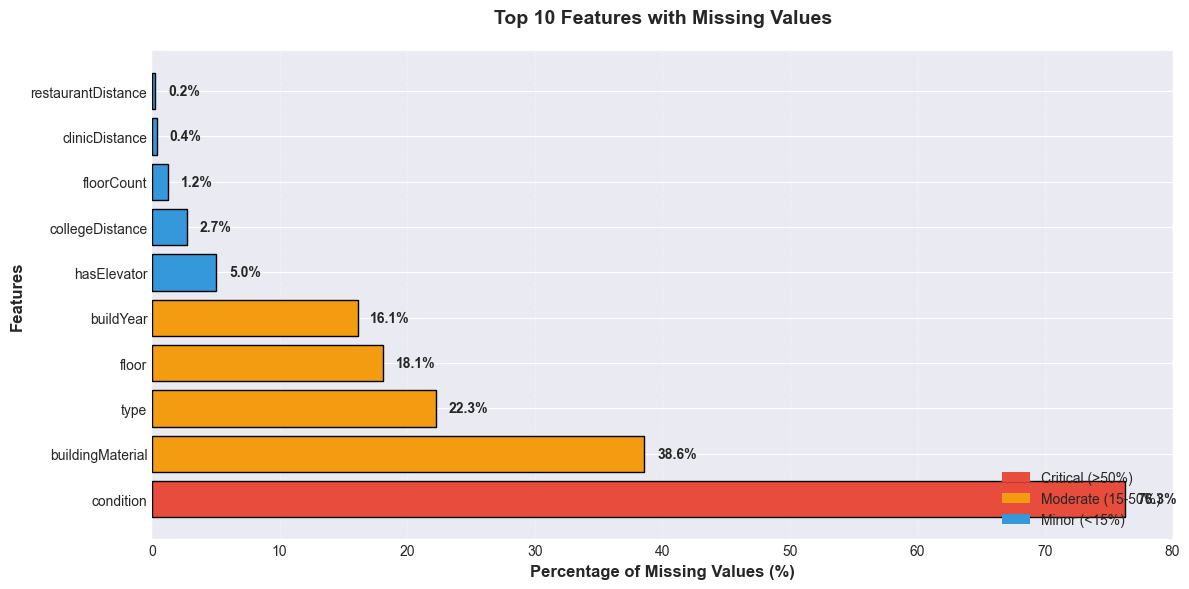

✓ Visualization saved: missing_values_analysis.png


In [7]:
# Visualize missing data
plt.figure(figsize=(12, 6))
missing_data_plot = missing_data.head(10)

colors = ['#e74c3c' if x > 50 else '#f39c12' if x > 15 else '#3498db' 
          for x in missing_data_plot['Percentage']]

bars = plt.barh(missing_data_plot.index, missing_data_plot['Percentage'], color=colors, edgecolor='black')

plt.xlabel('Percentage of Missing Values (%)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 10 Features with Missing Values', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add percentage labels
for i, (bar, val) in enumerate(zip(bars, missing_data_plot['Percentage'])):
    plt.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
             va='center', fontweight='bold', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', label='Critical (>50%)'),
    Patch(facecolor='#f39c12', label='Moderate (15-50%)'),
    Patch(facecolor='#3498db', label='Minor (<15%)')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: missing_values_analysis.png")

## 3. Feature Analysis: Apartment Condition

### 3.1 Data Preparation

The 'condition' feature has 76% missing values. Rather than dropping it, we'll treat missing values as a separate 'unknown' category to preserve valuable information.

In [15]:
# Handle missing values in 'condition'
df['condition'] = df['condition'].fillna('unknown')

print("Apartment Condition Categories:")
print("=" * 50)
print(df['condition'].value_counts())
print(f"\nUnique conditions: {df['condition'].unique()}")

Apartment Condition Categories:
condition
unknown    11836
premium     2237
low         1448
Name: count, dtype: int64

Unique conditions: <StringArray>
['premium', 'unknown', 'low']
Length: 3, dtype: str


### 3.2 Price Analysis by Condition

In [16]:
# Statistical summary by condition
condition_price_stats = df.groupby('condition')['price'].describe()

print("Price Statistics by Apartment Condition:")
print("=" * 80)
print(condition_price_stats)

# Key insights
print("\n" + "=" * 80)
print("Key Findings:")
print(f"  → Highest mean price: {condition_price_stats['mean'].idxmax()} "
      f"({condition_price_stats['mean'].max():,.0f} PLN)")
print(f"  → Lowest mean price:  {condition_price_stats['mean'].idxmin()} "
      f"({condition_price_stats['mean'].min():,.0f} PLN)")
print(f"  → Unknown category mean: {condition_price_stats.loc['unknown', 'mean']:,.0f} PLN")
print("\n  Note: 'Unknown' category shows high variance, suggesting owners")
print("        may have omitted condition data rather than indicating poor quality.")

Price Statistics by Apartment Condition:
             count       mean        std       min       25%       50%  \
condition                                                                
low         1448.0  657672.55  386223.50  186000.0  389000.0  591900.0   
premium     2237.0  877321.78  424939.15  185000.0  599000.0  780000.0   
unknown    11836.0  823125.07  430823.55  174900.0  553498.0  729000.0   

                75%       max  
condition                      
low        7.96e+05  3.15e+06  
premium    1.05e+06  3.20e+06  
unknown    9.70e+05  3.25e+06  

Key Findings:
  → Highest mean price: premium (877,322 PLN)
  → Lowest mean price:  low (657,673 PLN)
  → Unknown category mean: 823,125 PLN

  Note: 'Unknown' category shows high variance, suggesting owners
        may have omitted condition data rather than indicating poor quality.


### 3.3 Build Year Analysis by Condition

In [17]:
# Build year statistics by condition
condition_year_stats = df.groupby('condition')['buildYear'].describe()

print("Build Year Statistics by Condition:")
print("=" * 80)
print(condition_year_stats)

print("\n" + "=" * 80)
print("Insights:")
for condition in df['condition'].unique():
    avg_year = condition_year_stats.loc[condition, 'mean']
    print(f"  → {condition.capitalize()}: Average build year {avg_year:.0f}")

Build Year Statistics by Condition:
            count     mean    std     min     25%     50%     75%     max
condition                                                                
low        1211.0  1967.00  29.22  1860.0  1954.0  1970.0  1985.5  2024.0
premium    2050.0  1992.75  34.02  1870.0  1976.0  2009.0  2018.0  2024.0
unknown    9759.0  1987.36  34.81  1850.0  1968.0  2000.0  2017.0  2024.0

Insights:
  → Premium: Average build year 1993
  → Unknown: Average build year 1987
  → Low: Average build year 1967


### 3.4 Visualization: Price Distribution by Condition

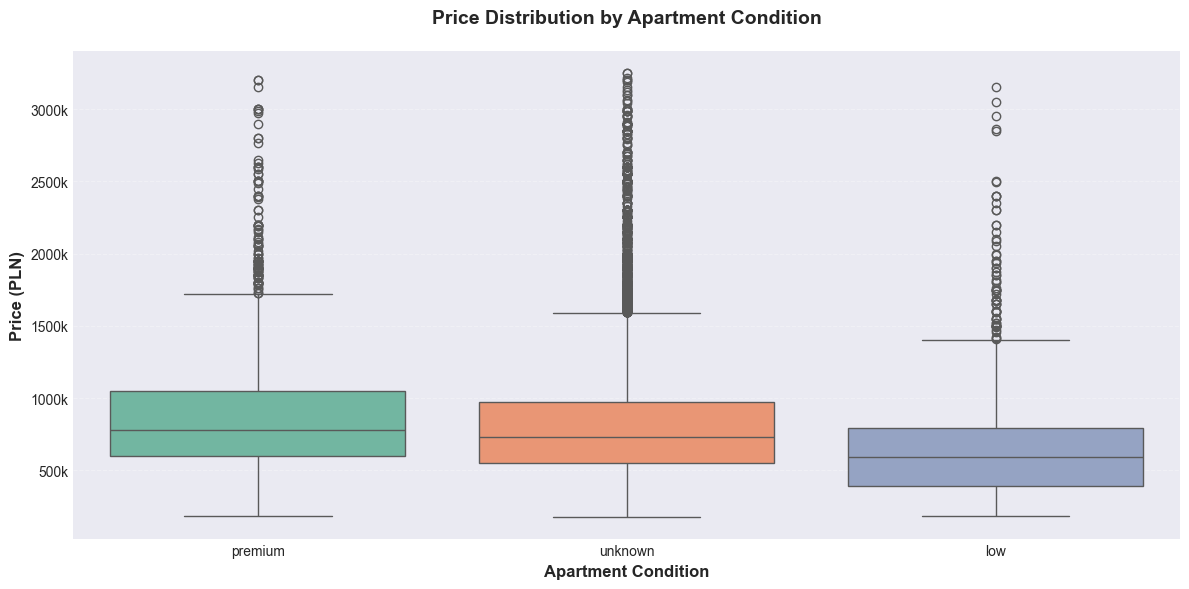

✓ Visualization saved: price_distribution_by_condition.png


In [18]:
# Box plot for price distribution
plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(data=df, x='condition', y='price', palette='Set2')

plt.xlabel('Apartment Condition', fontsize=12, fontweight='bold')
plt.ylabel('Price (PLN)', fontsize=12, fontweight='bold')
plt.title('Price Distribution by Apartment Condition', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=0)

# Format y-axis to show thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('price_distribution_by_condition.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: price_distribution_by_condition.png")

### 3.5 Comparative Analysis: Price vs Build Year

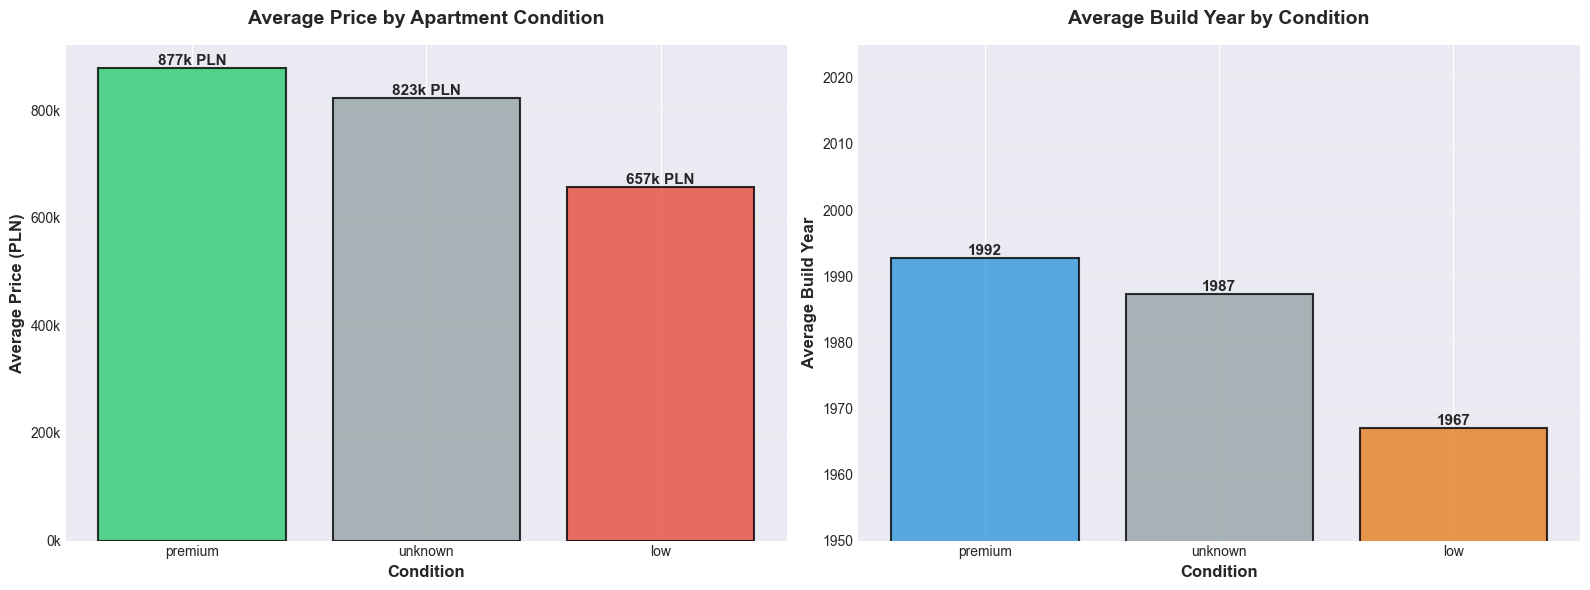

✓ Visualization saved: condition_price_year_comparison.png


In [19]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average Price by Condition
avg_price = df.groupby('condition')['price'].mean().sort_values(ascending=False)
colors_price = ['#2ecc71', '#95a5a6', '#e74c3c']  # Green, Gray, Red

bars1 = axes[0].bar(avg_price.index, avg_price.values, 
                     color=colors_price, edgecolor='black', linewidth=1.5, alpha=0.8)

axes[0].set_title('Average Price by Apartment Condition', 
                  fontweight='bold', fontsize=14, pad=15)
axes[0].set_ylabel('Average Price (PLN)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Condition', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height/1000)}k PLN',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 2: Average Build Year by Condition
avg_year = df.groupby('condition')['buildYear'].mean().sort_values(ascending=False)
colors_year = ['#3498db', '#95a5a6', '#e67e22']  # Blue, Gray, Orange

bars2 = axes[1].bar(avg_year.index, avg_year.values, 
                     color=colors_year, edgecolor='black', linewidth=1.5, alpha=0.8)

axes[1].set_title('Average Build Year by Condition', 
                  fontweight='bold', fontsize=14, pad=15)
axes[1].set_ylabel('Average Build Year', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Condition', fontsize=12, fontweight='bold')
axes[1].set_ylim(1950, 2025)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('condition_price_year_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: condition_price_year_comparison.png")

## 4. Key Findings

### Summary of Condition Analysis

1. **Missing Data Pattern:** The 'condition' feature has 76% missing values, which we treated as an 'unknown' category rather than removing the data.

2. **Price Variation:** All condition categories show high price variance, indicating that apartment condition alone is not the primary price driver.

3. **Unknown Category:** The 'unknown' category shows mean prices closer to 'premium' properties, suggesting that property owners may have simply omitted this field rather than indicating poor condition.

4. **Build Year Correlation:** Newer apartments tend to be in better condition, with premium properties having the most recent average build year.

### Next Steps

- Analyze price variation by city
- Investigate the impact of infrastructure features
- Build predictive models for price estimation
- Explore relationships between multiple features

---

## Appendix: Environment Information

In [20]:
# Display library versions
import sys

print("Environment Information:")
print("=" * 50)
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Environment Information:
Python version: 3.14.0
Pandas version: 3.0.0
NumPy version: 2.4.1
Matplotlib version: 3.10.8
Seaborn version: 0.13.2
